# Credit Card Fraud Detection

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statistics
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from collections import Counter

# 1. Data Exploration

**Import data**

In [2]:
data=pd.read_csv("D:data science project/python/classification/creditcard.csv")

In [3]:
data.shape

(284807, 31)

In [4]:
pd.set_option('max_columns', None)

In [5]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

**Missing Values**

In [7]:
is_NaN = data.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = data[row_has_NaN]

In [8]:
rows_with_NaN

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class


**Duplicate rows**

In [9]:
# Select duplicate rows except first occurrence based on all columns
duplicateRowsDF = data[data.duplicated()]
print("Duplicate Rows except first occurrence based on all columns are :")
print(duplicateRowsDF)

Duplicate Rows except first occurrence based on all columns are :
            Time        V1        V2        V3        V4        V5        V6  \
33          26.0 -0.529912  0.873892  1.347247  0.145457  0.414209  0.100223   
35          26.0 -0.535388  0.865268  1.351076  0.147575  0.433680  0.086983   
113         74.0  1.038370  0.127486  0.184456  1.109950  0.441699  0.945283   
114         74.0  1.038370  0.127486  0.184456  1.109950  0.441699  0.945283   
115         74.0  1.038370  0.127486  0.184456  1.109950  0.441699  0.945283   
...          ...       ...       ...       ...       ...       ...       ...   
282987  171288.0  1.912550 -0.455240 -1.750654  0.454324  2.089130  4.160019   
283483  171627.0 -1.464380  1.368119  0.815992 -0.601282 -0.689115 -0.487154   
283485  171627.0 -1.457978  1.378203  0.811515 -0.603760 -0.711883 -0.471672   
284191  172233.0 -2.667936  3.160505 -3.355984  1.007845 -0.377397 -0.109730   
284193  172233.0 -2.691642  3.123168 -3.339407  1.0170

In [10]:
data["Class"].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [11]:
data=data.drop_duplicates()

In [12]:
label=pd.DataFrame(data["Class"].value_counts())

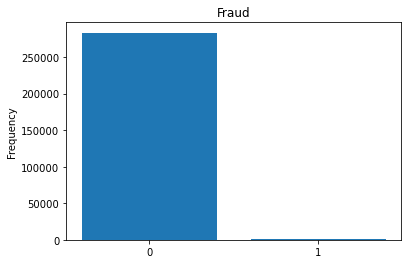

In [13]:
plt.bar(label.index,label.Class)
plt.xticks(label.index)
plt.ylabel('Frequency')
plt.title('Fraud')

plt.show()

As we can see, the data is heavily imbalanced. Imbalanced data can cause the classiffier having hard times when learning the minority class's pattern. NOTE: class= 1 is fraud and vice versa

# 2. Splitting the Data Into Train and Test 

In [14]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(data, test_size=0.2,random_state=0)

In [15]:
X_train=df_train.drop(["Class"],axis=1)
y_train=df_train["Class"]

In [16]:
X_test=df_test.drop(["Class"],axis=1)
y_test=df_test["Class"]

# 3. Random Forrest with Imbalanced data

In [17]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=0,n_jobs=-1)
rf.fit(X_train,y_train)
y=rf.predict(X_test)

Text(0.5, 1.0, 'Imbalanced Data')

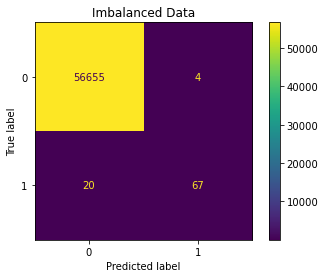

In [18]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(rf, X_test, y_test)
plt.title('Imbalanced Data')

The confusion matrix shows that there are 20 false prediction for class 1 (Fraud). So it can be concluded that the classifier is not good for credit card fraud detection. In order to solve this problem, the resampling method can be used.

# 4. Resampling

There are myriad resampling method that can be used to balance an imbalanced data. However, in this project i will only use 10 methods.

In [19]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=0)
x_rus, y_rus = rus.fit_resample(X_train, y_train)

print('original dataset shape:', Counter(y_train))
print('Resample dataset shape', Counter(y_rus))

original dataset shape: Counter({0: 226594, 1: 386})
Resample dataset shape Counter({0: 386, 1: 386})


In [20]:
# import library
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=0)

# fit predictor and target variable
x_ros, y_ros = ros.fit_resample(X_train, y_train)

print('Original dataset shape', Counter(y_train))
print('Resample dataset shape', Counter(y_ros))

Original dataset shape Counter({0: 226594, 1: 386})
Resample dataset shape Counter({0: 226594, 1: 226594})


In [21]:
# import library
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=0)

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(X_train, y_train)

print('Original dataset shape', Counter(y_train))
.0
print('Resample dataset shape', Counter(y_smote))

Original dataset shape Counter({0: 226594, 1: 386})
Resample dataset shape Counter({0: 226594, 1: 226594})


In [22]:
from imblearn.under_sampling import NearMiss

nm = NearMiss()

x_nm, y_nm = nm.fit_resample(X_train, y_train)

print('Original dataset shape:', Counter(y_train))
print('Resample dataset shape:', Counter(y_nm))

Original dataset shape: Counter({0: 226594, 1: 386})
Resample dataset shape: Counter({0: 386, 1: 386})


In [23]:
# import library
from imblearn.under_sampling import TomekLinks

tl = TomekLinks(sampling_strategy='majority')

# fit predictor and target variable
x_tl, y_tl = tl.fit_resample(X_train, y_train)

print('Original dataset shape', Counter(y_train))
print('Resample dataset shape', Counter(y_tl))

Original dataset shape Counter({0: 226594, 1: 386})
Resample dataset shape Counter({0: 226532, 1: 386})


In [24]:
from imblearn.under_sampling import ClusterCentroids

cc = ClusterCentroids(random_state=0)
X_cc, y_cc = cc.fit_resample(X_train, y_train)

print('Original dataset shape', Counter(y_train))
print('Resample dataset shape', Counter(y_cc))

Original dataset shape Counter({0: 226594, 1: 386})
Resample dataset shape Counter({0: 386, 1: 386})


In [25]:
from imblearn.combine import SMOTETomek

smt = SMOTETomek(random_state=0)
X_smt, y_smt = smt.fit_resample(X_train, y_train)

print('Original dataset shape', Counter(y_train))
print('Resample dataset shape', Counter(y_smt))

Original dataset shape Counter({0: 226594, 1: 386})
Resample dataset shape Counter({0: 225878, 1: 225878})


In [26]:
from imblearn.over_sampling import BorderlineSMOTE

bsmote = BorderlineSMOTE(kind = 'borderline-1',random_state=0)
X_bsmt, y_bsmt = bsmote.fit_resample(X_train, y_train)

print('Original dataset shape', Counter(y_train))
print('Resample dataset shape', Counter(y_bsmt))

Original dataset shape Counter({0: 226594, 1: 386})
Resample dataset shape Counter({0: 226594, 1: 226594})


In [27]:
from imblearn.over_sampling import SVMSMOTE

svmsmote = SVMSMOTE(random_state=0)
X_oversample_svm, y_oversample_svm = svmsmote.fit_resample(X_train, y_train)

print('Original dataset shape', Counter(y_train))
print('Resample dataset shape', Counter(y_oversample_svm))

Original dataset shape Counter({0: 226594, 1: 386})
Resample dataset shape Counter({0: 226594, 1: 135468})


In [28]:
from imblearn.over_sampling import ADASYN

adasyn = ADASYN(random_state=0)
X_oversample_ada, y_oversample_ada = adasyn.fit_resample(X_train, y_train)

print('Original dataset shape', Counter(y_train))
print('Resample dataset shape', Counter(y_oversample_ada))

Original dataset shape Counter({0: 226594, 1: 386})
Resample dataset shape Counter({1: 226692, 0: 226594})


# 5. Random Forrest with Balanced Data

In [29]:
from sklearn.ensemble import RandomForestClassifier
rf1 = RandomForestClassifier(random_state=0,n_jobs=-1)
rf2 = RandomForestClassifier(random_state=0,n_jobs=-1)
rf3 = RandomForestClassifier(random_state=0,n_jobs=-1)
rf4 = RandomForestClassifier(random_state=0,n_jobs=-1)
rf5 = RandomForestClassifier(random_state=0,n_jobs=-1)
rf6 = RandomForestClassifier(random_state=0,n_jobs=-1)
rf7 = RandomForestClassifier(random_state=0,n_jobs=-1)
rf8 = RandomForestClassifier(random_state=0,n_jobs=-1)
rf9 = RandomForestClassifier(random_state=0,n_jobs=-1)
rf10 = RandomForestClassifier(random_state=0,n_jobs=-1)
rf1.fit(x_rus,y_rus)
rf2.fit(x_ros,y_ros)
rf3.fit(x_smote,y_smote)
rf4.fit(x_nm,y_nm)
rf5.fit(x_tl,y_tl)
rf6.fit(X_bsmt,y_bsmt)
rf7.fit(X_oversample_ada,y_oversample_ada)
rf8.fit(X_smt,y_smt)
rf9.fit(X_oversample_svm,y_oversample_svm)
rf10.fit(X_cc,y_cc)

RandomForestClassifier(n_jobs=-1, random_state=0)

Text(0.5, 1.0, 'Cluster Centroid')

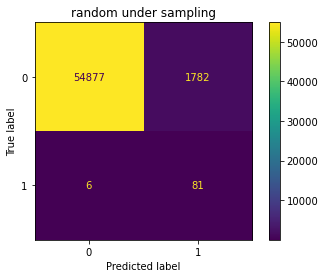

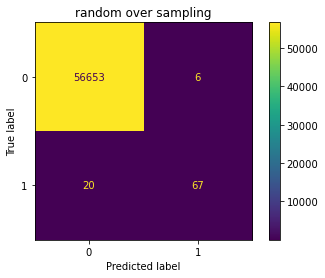

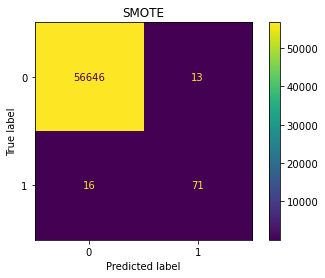

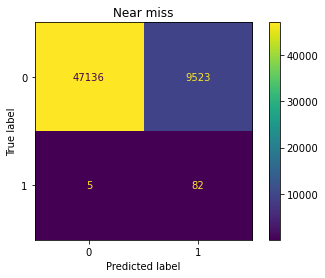

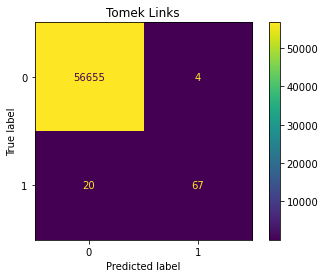

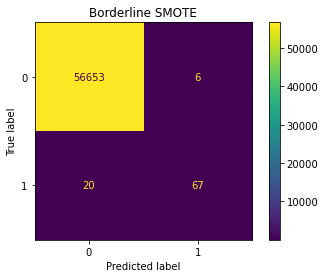

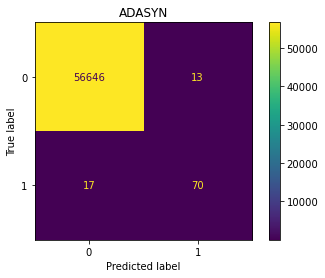

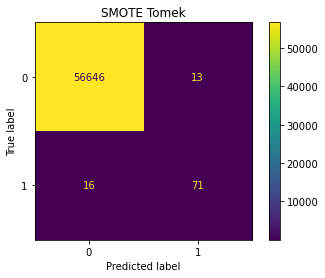

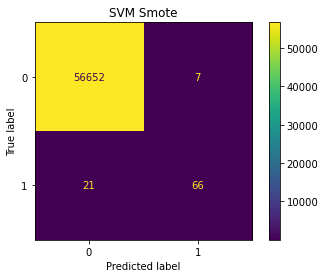

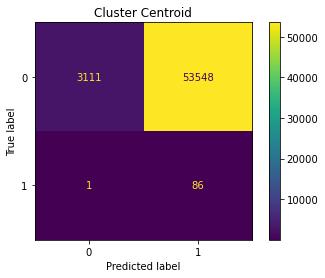

In [30]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(rf1, X_test, y_test)
plt.title('random under sampling')
plot_confusion_matrix(rf2, X_test, y_test)
plt.title('random over sampling')
plot_confusion_matrix(rf3, X_test, y_test)
plt.title('SMOTE')
plot_confusion_matrix(rf4, X_test, y_test)
plt.title('Near miss')
plot_confusion_matrix(rf5, X_test, y_test)
plt.title('Tomek Links')
plot_confusion_matrix(rf6, X_test, y_test)
plt.title('Borderline SMOTE')
plot_confusion_matrix(rf7, X_test, y_test)
plt.title('ADASYN')
plot_confusion_matrix(rf8, X_test, y_test)
plt.title('SMOTE Tomek')
plot_confusion_matrix(rf9, X_test, y_test)
plt.title('SVM Smote')
plot_confusion_matrix(rf10, X_test, y_test)
plt.title('Cluster Centroid')

| Resampling Method  | True Negative | False Negative |
| ------------------ | ------------- | -------------- | 
| Random under sampling| 81            | 6             | 
| Random over sampling | 67           | 20            |
| SMOTE                | 71            | 16            |
| Near miss            | 82           | 5            |
| Tomek Links          | 67           | 20           |
| Borderline SMOTE     | 67           | 20           |
| ADASYN               | 70           | 17           |
| SMOTE Tomek          | 71           | 16           |
| SVM SMOTE            | 66           | 21           |
| Cluster Centroid     | 86           | 1           |

The table shows that the classifier using cluster centroid resampling method perform well in predicting the minority class, but it doesn't perform well in predicting the majority class. From the result above, it can be concluded that resampling method can improve classifier in predicting minority class and there is no one fit all resampling method to improve classifier performance. different data require different resampling method.